In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Insert filename with format :pic3.jpg


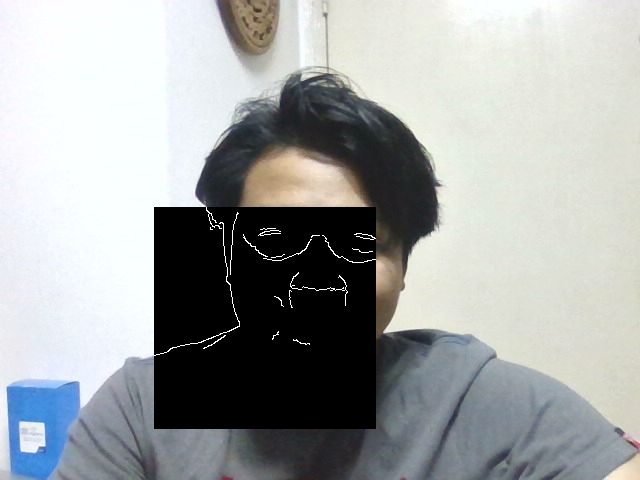

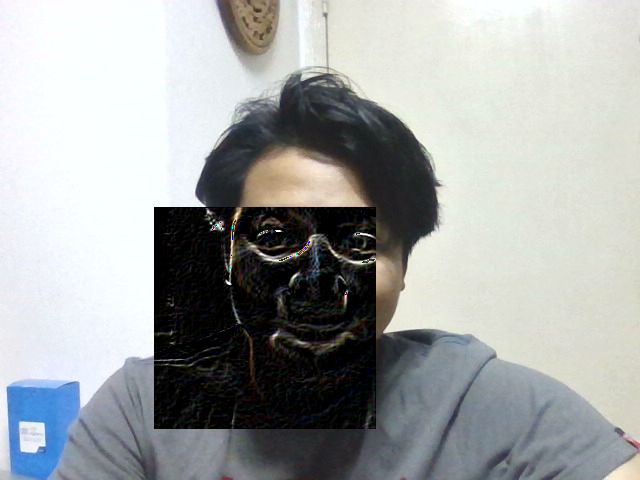

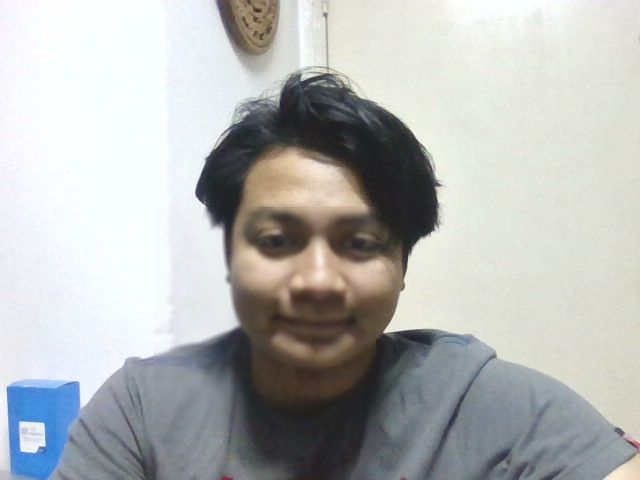

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#read the images and store in numpy
name = input("Insert filename with format :")
pic1 = cv2.imread(name)

#change bgr to rgb
pic1_rgb = pic1[:,:,::-1]

#copy for final output
final_canny1 = pic1_rgb
final_sobel1 = pic1_rgb
final_blur1 = pic1_rgb

#declare model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

#detect in rgb                                              
face1 = face_cascade.detectMultiScale(pic1_rgb, 1.05 , 2)

for (x1,y1,w1,h1) in face1:
  crop1 = pic1_rgb[x1:x1+w1, y1:y1+h1]
  cv2.rectangle(pic1_rgb,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)

#canny
crop_gray = cv2.cvtColor(crop1,cv2.COLOR_RGB2GRAY)
canny1 = cv2.Canny(crop_gray,100,200)
canny_merge = cv2.merge([canny1,canny1,canny1])

#sobel
sobelx = cv2.Sobel(crop1, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(crop1, cv2.CV_8U,0,1,ksize=3)
sobel1 = sobelx + sobely

#blurr
blur1 = cv2.GaussianBlur(crop1,(5,5),30)

#getting final image
final_canny1[x1:x1+w1, y1:y1+h1] = canny_merge
final_canny1 = cv2.cvtColor(final_canny1, cv2.COLOR_BGR2RGB)

final_sobel1[x1:x1+w1, y1:y1+h1] = sobel1 
final_sobel1 = cv2.cvtColor(final_sobel1, cv2.COLOR_BGR2RGB)

final_blur1[x1:x1+w1, y1:y1+h1 ] = blur1
final_blur1 = cv2.cvtColor(final_blur1, cv2.COLOR_BGR2RGB)

cv2_imshow(final_canny1)
cv2_imshow(final_sobel1)
cv2_imshow(final_blur1)

cv2.imwrite("Canny.jpg", final_canny1)
cv2.imwrite("Sobel.jpg", final_sobel1)
cv2.imwrite("Blurred.jpg", final_blur1)

(-0.5, 221.5, 221.5, -0.5)

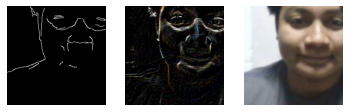

In [ ]:
plt.subplot(131);plt.imshow(canny_merge) ;plt.axis("off")
plt.subplot(132);plt.imshow(sobel1);plt.axis("off")
plt.subplot(133);plt.imshow(blur1);plt.axis("off")